In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Arbol de decision para especies de flores

In [2]:
df = pd.read_csv("../../python-ml-course-master/datasets/iris/iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.

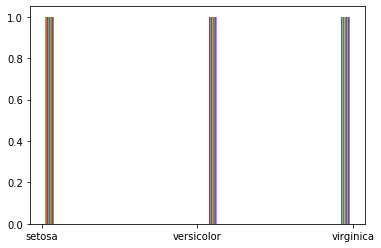

In [4]:
plt.hist(df.Species)

In [5]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col_names = df.columns.values.tolist()
col_names

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [7]:
predictors = col_names[:4]
target = col_names[4]

In [8]:
df["is_train"] = np.random.uniform(0,1,len(df))<0.75

In [9]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,False
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


(array([ 34.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 116.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float16),
 <a list of 10 Patch objects>)

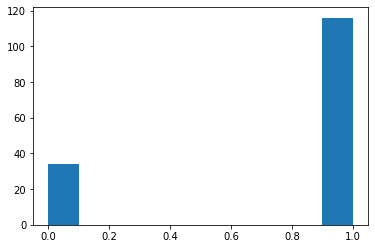

In [10]:
plt.hist(df.is_train.astype(np.float16))

In [11]:
train, test = df[df["is_train"]==True],df[df["is_train"]==False]

In [12]:
len(train), len(test)

(116, 34)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20,random_state=99)
tree.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [15]:
preds = tree.predict(test[predictors])

In [16]:
pd.crosstab(test[target], preds, rownames=["Actual"],colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,9,0
virginica,0,4,7


In [17]:
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

# El tratamiento de ficheros dot

### Para poder vizualizar hay que generar un archivo .dot

In [18]:
from sklearn.tree import export_graphviz

In [19]:
with open("S10 Arboles y bosques Aleatorios - C144 El tratamiento de ficheros dot.dot", "w") as dotfile:
    export_graphviz(tree,out_file=dotfile,feature_names=predictors)
    dotfile.close()

In [20]:
import os 
from graphviz import Source

In [21]:
file = open("S10 Arboles y bosques Aleatorios - C144 El tratamiento de ficheros dot.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.583\\nsamples = 116\\nvalue = [36, 41, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 80\\nvalue = [0, 41, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Sepal.Length <= 7.1\\nentropy = 0.165\\nsamples = 41\\nvalue = [0, 40, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 40\\nvalue = [0, 40, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.85\\nentropy = 0.172\\nsamples = 39\\nvalue = [0, 1, 38]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 0, 36]"] ;\n6 -> 8 ;\n}'

In [22]:
os.environ["PATH"] += os.pathsep + "C:/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz/"

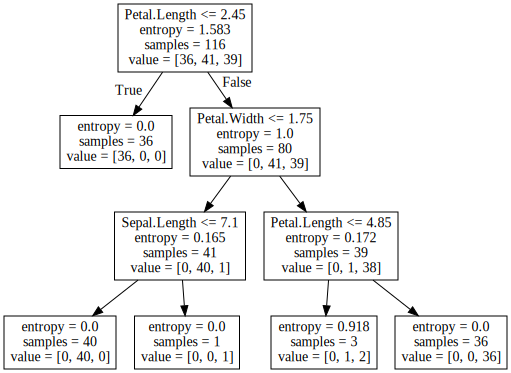

In [23]:
Source(text)

# La validación cruzada en un árbol de clasificación

## (poda)

In [24]:
X = df[predictors]
Y = df[target]

In [25]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5,min_samples_split=20,random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [26]:
from sklearn.model_selection import KFold

In [27]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [30]:
score = np.mean(scores)
score

0.9333333333333333

In [31]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [32]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']